# Distribution of domains and sessions

In [84]:
from collections import defaultdict
from enum import Enum
import matplotlib.pyplot as plt
import csv
import os
import numpy as np

In [66]:
def print_session_names(conference_dict):
    """
    Prints the names of sessions from a dictionary.

    Parameters:
    conference_dict (dict): A dictionary where keys are session names.
    """
    for session_name in conference_dict.keys():
        print(f"{session_name}")

In [67]:
def csv_to_dict(csv_filename):
    """
    Convert CSV file to nested dictionary structure.
    
    Args:
        csv_filename (str): Filename of CSV in 'csv_files' folder
    
    Returns:
        dict: Nested dictionary with paper information
    """
    file_path = os.path.join('csv_files', csv_filename)
    
    merged_dict_all = {}
    
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            category = row['category']
            
            # Initialize category if not exists
            if category not in merged_dict_all:
                merged_dict_all[category] = {'papers': []}
            
            # Create paper entry
            paper_entry = {
                'name': row['name'],
                'authors': row['authors'].split(', '),
                'url': row['url'],
                'distinguished': row['distinguished'].lower() == 'true'
            }
            
            # Add paper to category
            merged_dict_all[category]['papers'].append(paper_entry)
    
    return merged_dict_all

merged_dict_all = csv_to_dict("session and papers all conferences.csv")

## Categorize sessions an papers into groups that were defined by the authors

In [68]:
def categorize_sessions_and_papers(merged_dict_all):
    """
    Assigns sessions (and their papers) to their corresponding groups.
    
    Args:
        merged_dict_all (dict): Dictionary containing the unsorted sessions

    Returns:
        dict: Dictionary where keys are group names and values are the sessions and their papers.
    """
    # Grouping name: AI Engineering/Software Engineering AI-Systems
    group_ai_engineering = Enum('group_ai_engineering', ['AI systems engineering', 'Development and evolution of AI-intensive systems', 'AI bias and fairness', 'SE4AI', 'SE for AI'])
    # Grouping name: AI for Software Engineering
    group_ai_4_se = Enum('group_ai_4_se', ['AI models for SE', 'Pre-trained and few shot learning for SE', 'AI for SE', 'AI4SE'])
    # Grouping name: AI/ML Specific
    group_ai_ml = Enum('group_ai_ml', ['Recommender systems', 'Generative AI studies', 'LLM, NN and other AI technologies', 'Machine Learning'])
   # Grouping name: Performance
    group_ai_performance = Enum('group_ai_performance', ['Software performance', 'Performance'])
    # Grouping name: Code Quality and Management
    group_quality_management = Enum('group_quality_management', ['Code smells and clones', 'Code review', 'Code Generation', 'Language Models and Generated Code', 'Code Search and Text to Code', 'Models of Code and Documentation', 'Code Search and Completion', 'Code Summarization and Recommendation', 'Code Similarities and Refactoring', 'Code Quality and Code Smells', 'Code Summarization', 'Mining software repositories', 'Code Change Analysis', 'Analytics & AI', 'Clone and Similarity Detection', 'Analytics', 'Log Analysis and Debugging'])
    # Grouping name: Security and Privacy
    group_security_privacy = Enum('group_security_privacy', ['Software security and privacy', 'SE for security', 'AI & Security', 'Security', 'Security and Privacy'])
    # Grouping name: Vulnerability Detection and Repair
    group_vulnerability = Enum('group_vulnerability', ['Vulnerability detection', 'Vulnerability and Security', 'Vulnerability analysis and assessment', 'Software vulnerabilities', 'Vulnerability testing and patching', 'Dependability and Formal methods'])
     # Grouping name: Software Development, Processes, and Evolution
    group_software_dev = Enum('group_software_dev', ['APIs and libraries', 'Software development tools', 'Processes, Requirements, and Architecture', 'Builds and Dependencies', 'Software logging', 'Software ecosystems', 'Cloud and Distributed Systems', 'Mobile Development', 'Builds and Versions', 'Configuration and Version Management', 'Infrastructure, Build, and Logs', 'Evolution & AI', 'Evolution', 'Documentation', 'Build and Dependencies', 'Software Maintenance and Comprehension', 'Program comprehension', 'Program binaries - evolvability', 'Reverse engineering'])
     # Grouping name: Human Factors and Social Aspects
    group_human_social = Enum('group_human_social', ['Human and Social', 'Human and Social Aspects, and Requirements', 'Human Aspects', 'Human and Social Aspects', 'SE education methods and tools', "Developers' behaviors", 'Studies on gender in SE', "Developers' forums", 'Open Source and Software Ecosystems', 'Software processes', 'Cognitive aspects of software development', 'Issue reporting and reproduction', 'Empirical Studies'])
     # Grouping name: Requirements Engineering
    group_requirements = Enum('group_requirements', ['Requirements elicitation and understanding', 'Requirements engineering', 'Requirements'])
     # Grouping name: Compiler/Languages
    group_compilers_languages = Enum('group_compilers_languages', ['Compilers and Languages', 'Programming languages'])
     # Grouping name: Special Applications and Domains
    group_special_apps = Enum('group_special_apps', ['Application Domains', 'Mobile Apps', 'Web, Cloud, Networking', 'Safety-Critical and Self-Adaptive Systems', 'Web Development', 'Smart Contracts, Blockchain, Energy efficiency, and green software', 'Blockchain/smart contracts', 'Autonomous Systems and Agents', 'Software architectures and design', 'Software design and architecture'])
     # Grouping name: Testing
    group_testing = Enum('group_testing', ['Fuzzing: applications', 'Fuzzing: techniques and tools', 'Test generation', 'Metamorphic testing', 'Cyber-physical systems testing', 'Dynamic and Concolic Analysis', 'Testing of mobile, web and games', 'Testing Tools and Techniques', 'Software quality', 'Software testing for specialized systems', 'Testing with and for AI', 'Testing of AI systems', 'AI testing', 'Software verification', 'Testing', 'Fuzzing', 'Testing of database and low-level software', 'Debugging', 'Testing: various bug types', 'Testing AI Systems', 'Debugging and Troubleshooting', 'Test quality and improvement', 'Fault injection and mutation'])
     # Grouping name: Program Analysis and Repair
    group_program_analysis = Enum('group_program_analysis', ['Program translation and synthesis', 'Program repair techniques and applications', 'Program repair with and for AI', 'Program analysis', 'Automated Repair', 'Program Analysis and Performance', 'Program Repair and Synthesis', 'Program Verification', 'Program Repair', 'Code analysis', 'Runtime analysis and self-adaptation'])
     # Grouping name: Software Analysis
    group_software_analysis = Enum('group_software_analysis', ['Defect detection and prediction', 'Static Detection Techniques', 'Analysis', 'Analysis and Debugging', 'Fault Diagnosis and Root Cause Analysis', 'Source Code Manipulation', 'Formal verification', 'Formal Methods and Models'])
     # Grouping name: Bug prediction and repair 
    group_bugs = Enum('group_bugs', ['Fault localization', 'Bug Prediction and Localization', 'Bug Detection', 'Software repairs'])
    
    # Combine all enums into a list for easier iteration
    all_groups = [group_ai_engineering, group_ai_4_se, group_ai_ml, group_ai_performance, group_quality_management, group_security_privacy, group_vulnerability, group_software_dev, group_human_social, group_requirements, group_compilers_languages, group_special_apps, group_testing, group_program_analysis, group_software_analysis, group_bugs]

    # Dictionary to store the categorized sessions and papers
    categorized_data = defaultdict(lambda: defaultdict(dict))

    def find_matching_group(session_name):
        for group in all_groups:
            if any(enum_value.name.lower() in session_name.lower() for enum_value in group):
                return group.__name__
        return 'Uncategorized'

    # Iterate through all session names in merged_dict_all
    for session_name, session_data in merged_dict_all.items():
        matching_group = find_matching_group(session_name)
        categorized_data[matching_group][session_name] = session_data

    # Convert defaultdict to regular dict
    categorized_data = dict(categorized_data)
    for group in categorized_data:
        categorized_data[group] = dict(categorized_data[group])

    return categorized_data

In [69]:
def print_papers_by_group(categorized_data):
    """
    Print papers for each session group.
    
    Args:
        categorized_data (dict): Dictionary containing categorized sessions and papers
    """
    # Filter for categories that start with "session_"
    session_groups = {k: v for k, v in categorized_data.items() if k.startswith('group_')}
    
    for group_name, sessions in session_groups.items():
        print("\n" + "=" * 80)
        print(f"Group: {group_name}")
        print("=" * 80)
        
        # Track paper count for this group
        paper_count = 1
        
        # Iterate through all sessions in this group
        for session_name, session_data in sessions.items():
            if 'papers' in session_data:
                for paper in session_data['papers']:
                    print(f"\nTitle: {paper.get('name', 'No title available')}")
                    print(f"Authors: {', '.join(paper.get('authors', ['No authors available']))}")
                    print(f"URL: {paper.get('url', 'No URL available')}")
                    paper_count += 1
        
        # Print total number of papers in this group
        print(f"\nTotal papers in {group_name}: {paper_count - 1}")

In [70]:
def calculate_paper_distribution_by_group(categorized_data):
    """
    Calculate the distribution (percentage) of papers in each group.
    
    Args:
        categorized_data (dict): Dictionary containing categorized sessions and papers.
        
    Returns:
        dict: Dictionary where keys are group names and values are the percentage of papers in each group.
    """
    # Initialize dictionary to store the count of papers per group
    paper_counts = {}
    total_papers = 0
    
    # First, calculate the total number of papers and count papers in each group
    for group_name, sessions in categorized_data.items():
        paper_count = sum(len(session_data.get('papers', [])) for session_data in sessions.values())
        paper_counts[group_name] = paper_count
        total_papers += paper_count
    
    # Calculate percentage distribution
    paper_distribution_percentage = {
        group_name: (count / total_papers) * 100 if total_papers > 0 else 0
        for group_name, count in paper_counts.items()
    }
    
    return paper_counts, paper_distribution_percentage  # Return both absolute counts and percentages

In [71]:
def analyze_and_visualize_distribution(categorized_data, display_names=None):
    """
    Analyze and visualize the paper distribution across groups.
    
    Args:
        categorized_data (dict): Dictionary containing categorized sessions and papers.
        display_names (dict, optional): Mapping of group names to display names.
    """
    
    # Calculate distribution (both absolute counts and percentage)
    paper_counts, distribution_percentage = calculate_paper_distribution_by_group(categorized_data)
    
    # Sort distribution by percentage in descending order
    sorted_distribution = dict(sorted(distribution_percentage.items(), 
                                    key=lambda x: x[1], 
                                    reverse=True))
    
    # Print sorted distribution with display names
    print("\nPaper distribution by group (sorted by percentage):")
    for group, percentage in sorted_distribution.items():
        display_name = display_names.get(group, group)  # Use original name if no mapping exists
        print(f"{display_name}: {percentage:.2f}% (Absolute: {paper_counts[group]})")
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Create bar chart
    bars = plt.bar(range(len(sorted_distribution)), 
                   list(sorted_distribution.values()))
    
    # Customize the plot
    plt.title('Paper Distribution Across Groups', fontsize=14)
    plt.xlabel('Groups', fontsize=12)
    plt.ylabel('Percentage of Papers (%)', fontsize=12)
    
    # Use display names for x-axis labels
    display_labels = [display_names.get(name, name) for name in sorted_distribution.keys()]
    plt.xticks(range(len(sorted_distribution)), 
               display_labels, 
               rotation=45, 
               ha='right')
    
    # Add both percentage and absolute number of papers on top of each bar
    for bar, group in zip(bars, sorted_distribution.keys()):
        height = bar.get_height()
        absolute_count = paper_counts[group]
        # Display both percentage and absolute count on top of the bar
        plt.text(bar.get_x() + bar.get_width() / 2., 
                 height, 
                 f'{height:.1f}%\n({absolute_count})', 
                 ha='center', 
                 va='bottom', 
                 fontsize=10, 
                 color='black')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Define the original domain names to use them as labels for the graph
display_names = {
    'group_ai_engineering': 'AI Engineering/Software Engineering AI-Systems ',
    'group_ai_4_se': 'AI for Software Engineering',
    'group_ai_ml': 'AI/ML Specific ',
    'group_ai_performance': 'Performance',
    'group_quality_management': 'Code Quality and Management',
    'group_security_privacy': 'Security and Privacy',
    'group_vulnerability': 'Vulnerability Detection and Repair',
    'group_software_dev': 'Software Development, Processes, and Evolution',
    'group_human_social': 'Human Factors and Social Aspects',
    'group_requirements': 'Requirements Engineering',
    'group_compilers_languages': 'Compiler/Languages',
    'group_special_apps': 'Special Applications and Domains',
    'group_testing': 'Testing',
    'group_program_analysis': 'Program Analysis and Repair ',
    'group_software_analysis': 'Software Analysis',
    'group_bugs': 'Bug prediction and repair',
    'Uncategorized': 'Irrelevant'
}

## Distribution of SESSIONS according to number of papers

In [1]:
grouped_sessions = categorize_sessions_and_papers(merged_dict_all)

# Create variables for each group
group_ai_engineering = grouped_sessions.get('group_ai_engineering', {})
group_ai_4_se = grouped_sessions.get('group_ai_4_se', {})
group_ai_ml = grouped_sessions.get('group_ai_ml', {})
group_ai_performance = grouped_sessions.get('group_ai_performance', {})
group_quality_management = grouped_sessions.get('group_quality_management', {})
group_security_privacy = grouped_sessions.get('group_security_privacy', {})
group_vulnerability = grouped_sessions.get('group_vulnerability', {})
group_software_dev = grouped_sessions.get('group_software_dev', {})
group_human_social = grouped_sessions.get('group_human_social', {})
group_requirements = grouped_sessions.get('group_requirements', {})
group_compilers_languages = grouped_sessions.get('group_compilers_languages', {})
group_special_apps = grouped_sessions.get('group_special_apps', {})
group_testing = grouped_sessions.get('group_testing', {})
group_program_analysis = grouped_sessions.get('group_program_analysis', {})
group_software_analysis = grouped_sessions.get('group_software_analysis', {})
group_bugs = grouped_sessions.get('group_bugs', {})
uncategorized_data = grouped_sessions.get('Uncategorized', {})

#print_papers_by_group(grouped_sessions)

NameError: name 'categorize_sessions_and_papers' is not defined

### Check if there are uncategorized sessions:

In [73]:
print_session_names(uncategorized_data)

Posters
Welcome to Day


These two sessions have been declared as irrelevant by the involved researchers and are therefore dropped from this point on.
So next we can calculate the distribution of the sessions by their corrresponding number of papers.


Paper distribution by group (sorted by percentage):
Testing: 21.13% (Absolute: 199)
Software Development, Processes, and Evolution: 12.85% (Absolute: 121)
Code Quality and Management: 11.89% (Absolute: 112)
Program Analysis and Repair : 8.70% (Absolute: 82)
Human Factors and Social Aspects: 7.75% (Absolute: 73)
Security and Privacy: 7.01% (Absolute: 66)
Software Analysis: 6.48% (Absolute: 61)
AI/ML Specific : 4.88% (Absolute: 46)
Vulnerability Detection and Repair: 3.29% (Absolute: 31)
AI for Software Engineering: 3.08% (Absolute: 29)
Special Applications and Domains: 3.08% (Absolute: 29)
AI Engineering/Software Engineering AI-Systems : 2.34% (Absolute: 22)
Irrelevant: 2.23% (Absolute: 21)
Performance: 2.12% (Absolute: 20)
Bug prediction and repair: 1.59% (Absolute: 15)
Requirements Engineering: 0.85% (Absolute: 8)
Compiler/Languages: 0.74% (Absolute: 7)


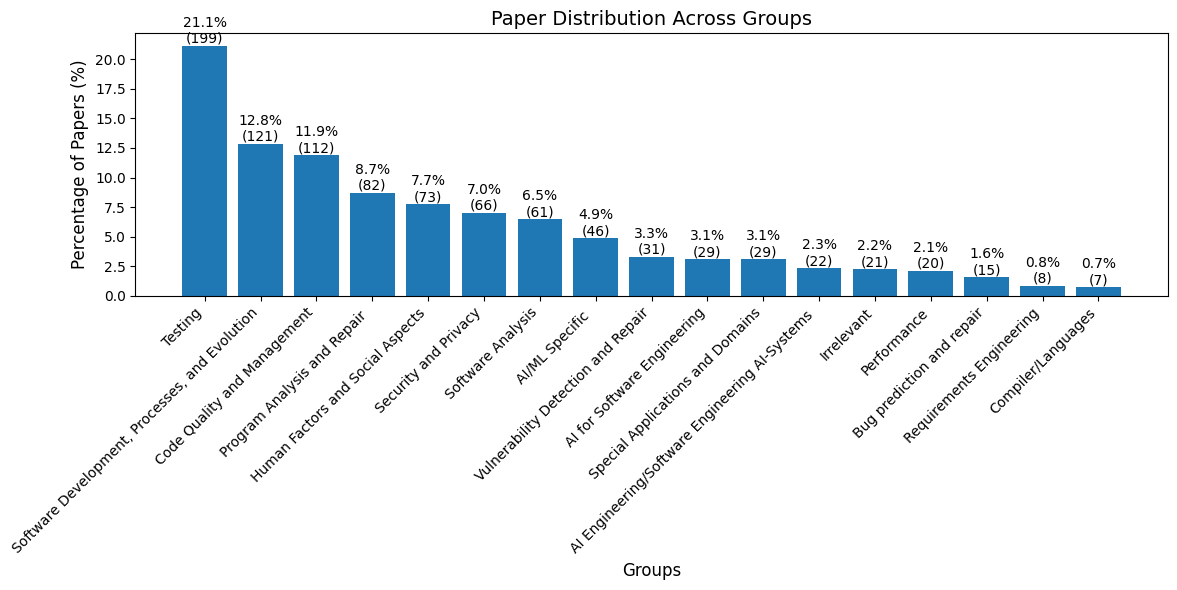

In [74]:
analyze_and_visualize_distribution(grouped_sessions, display_names)

## Distribution of DOMAINS according to number of papers per related sessions

In [75]:
def print_papers_by_domain(categorized_data, domain_mappings):
    """
    Print papers organized by domains and their session groups.
    
    Args:
        categorized_data (dict): Dictionary containing categorized sessions and papers
        domain_mappings (dict): Dictionary mapping session groups to their domains
    """
    # Create a dictionary to organize data by domain
    domain_papers = {}
    
    # Organize sessions into their respective domains
    for group_name, sessions in categorized_data.items():
        if group_name in domain_mappings:
            domain = domain_mappings[group_name]
            if domain not in domain_papers:
                domain_papers[domain] = {}
            domain_papers[domain][group_name] = sessions

    # Print papers for each domain
    for domain, groups in domain_papers.items():
        print("\n" + "=" * 80)
        print(f"Domain: {domain}")
        print("=" * 80)
        
        total_domain_papers = 0
        
        # Print papers for each group in this domain
        for group_name, sessions in groups.items():
            print(f"\nGroup: {group_name}")
            print("-" * 40)
            
            paper_count = 1
            
            # Iterate through all sessions in this group
            for session_name, session_data in sessions.items():
                if 'papers' in session_data:
                    for paper in session_data['papers']:
                        print(f"\nPaper {paper_count}: {paper.get('title', 'No title available')}")
                        print(f"Authors: {', '.join(paper.get('authors', ['No authors available']))}")
                        print(f"URL: {paper.get('url', 'No URL available')}")
                        paper_count += 1
            
            group_paper_count = paper_count - 1
            print(f"\nTotal papers in {group_name}: {group_paper_count}")
            total_domain_papers += group_paper_count
        
        print(f"\nTotal papers in {domain}: {total_domain_papers}")

In [76]:
def calculate_domain_paper_distribution(categorized_data, domain_mappings):
    """
    Calculate the percentage of papers in each domain.

    Args:
        categorized_data (dict): Dictionary containing categorized sessions and papers.
        domain_mappings (dict): Dictionary mapping session groups to their domains.

    Returns:
        tuple: (domain_distribution_percentage, papers_count_example)
            domain_distribution_percentage (dict): Dictionary where keys are domain names and values are the percentage of papers in each domain.
            papers_count_example (dict): Dictionary where keys are domain names and values are the total number of papers in each domain.
    """
    # Initialize dictionary to store paper counts for each domain
    domain_paper_counts = {}
    total_papers = 0

    # Organize sessions into their respective domains and count papers
    for group_name, sessions in categorized_data.items():
        if group_name in domain_mappings:
            domain = domain_mappings[group_name]
            if domain not in domain_paper_counts:
                domain_paper_counts[domain] = 0
            
            # Count the papers in each session within the group
            for session_data in sessions.values():
                papers = session_data.get('papers', [])
                paper_count = len(papers)
                domain_paper_counts[domain] += paper_count
                total_papers += paper_count

    # Calculate percentage distribution
    domain_distribution_percentage = {
        domain: (count / total_papers) * 100 if total_papers > 0 else 0
        for domain, count in domain_paper_counts.items()
    }

    # Save the total paper counts in a separate dictionary
    papers_count_example = domain_paper_counts

    return domain_distribution_percentage, papers_count_example

In [77]:
def plot_domain_paper_distribution(distribution_percentage, paper_counts, display_names):
    """
    Plot a pie chart and a sorted, monochrome vertical bar chart for the paper distribution percentage by domain, using display names.
    
    Args:
        distribution_percentage (dict): Dictionary with domain names as keys and their percentage of papers as values.
        paper_counts (dict): Dictionary with domain names as keys and the absolute number of papers as values.
        display_names (dict): Dictionary mapping domain variable names to display names.
    """
    # Prepare data for plotting, using display names instead of variable names
    labels = [display_names.get(domain, domain) for domain in distribution_percentage.keys()]
    sizes = list(distribution_percentage.values())
    absolute_counts = [paper_counts.get(domain, 0) for domain in distribution_percentage.keys()]
    colors = plt.cm.Paired(range(len(labels)))  # Colors for the pie chart

    # Pie chart
    plt.figure(figsize=(8, 8))
    patches, texts, autotexts = plt.pie(sizes, labels=[f"{label}" for label in labels], 
                                       autopct=lambda p: '{:.1f}% ({:d})'.format(p, int(p*sum(absolute_counts)/100)), 
                                       startangle=140, colors=colors)

    # Adjust text properties
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('normal')

    plt.title("Paper Distribution by Domain")
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.show()

    # Sort data in descending order for the bar chart
    sorted_data = sorted(zip(sizes, absolute_counts, labels), reverse=True)
    sorted_sizes, sorted_absolute_counts, sorted_labels = zip(*sorted_data)

    # Vertical Bar Chart with sorted data
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_labels, sorted_sizes)
    plt.title("Paper Distribution by Domain")
    plt.xlabel("Domains")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability

    # Display percentage and absolute number of papers on top of each bar
    for bar, size, absolute_count in zip(bars, sorted_sizes, sorted_absolute_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                 f'{size:.1f}%\n({absolute_count})',  # Format to one decimal place for percentage
                 ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

In [78]:
# Define domain mappings
domain_mappings = {
    'group_ai_engineering': 'domain_ai_se',
    'group_ai_4_se': 'domain_ai_se',
    'group_ai_ml': 'domain_ai_se',
    'group_ai_performance': 'domain_analytics',
    'group_quality_management': 'domain_analytics',
    'group_security_privacy': 'domain_dependability_security',
    'group_vulnerability': 'domain_dependability_security',
    'group_software_dev': 'domain_evolution',
    'group_human_social': 'domain_human_social',
    'group_requirements': 'domain_requirements_modelling',
    'group_compilers_languages': 'domain_requirements_modelling',
    'group_special_apps': 'domain_requirements_modelling',
    'group_testing': 'domain_testing_analysis',
    'group_program_analysis': 'domain_testing_analysis',
    'group_software_analysis': 'domain_testing_analysis',
    'group_bugs': 'domain_testing_analysis'
}

# Calculate and print the percentage distribution
domain_distribution_percentage, papers_count = calculate_domain_paper_distribution(grouped_sessions, domain_mappings)

# Print the percentages in descending order
sorted_domain_distribution = dict(sorted(domain_distribution_percentage.items(), 
                                    key=lambda x: x[1], 
                                    reverse=True))

print("\nPaper distribution by group (sorted by percentage):")
for group, percentage in sorted_domain_distribution.items():
    print(f"{group}: {percentage:.2f}%")

# Example usage of the papers_count_example dictionary
print("\nPaper counts per domain:")
for domain, count in papers_count.items():
    print(f"{domain}: {count}")


Paper distribution by group (sorted by percentage):
domain_testing_analysis: 38.76%
domain_analytics: 14.33%
domain_evolution: 13.14%
domain_ai_se: 10.53%
domain_dependability_security: 10.53%
domain_human_social: 7.93%
domain_requirements_modelling: 4.78%

Paper counts per domain:
domain_ai_se: 97
domain_testing_analysis: 357
domain_analytics: 132
domain_evolution: 121
domain_requirements_modelling: 44
domain_human_social: 73
domain_dependability_security: 97


In [79]:
# You can un-comment this if you want to display the papers by domains
#print_papers_by_domain(grouped_sessions, domain_mappings)

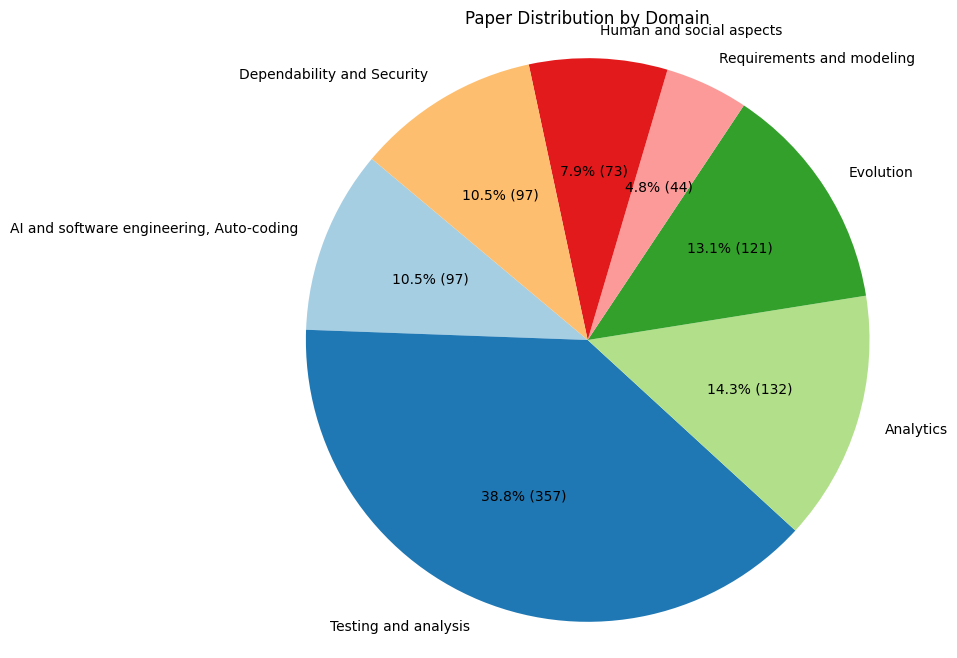

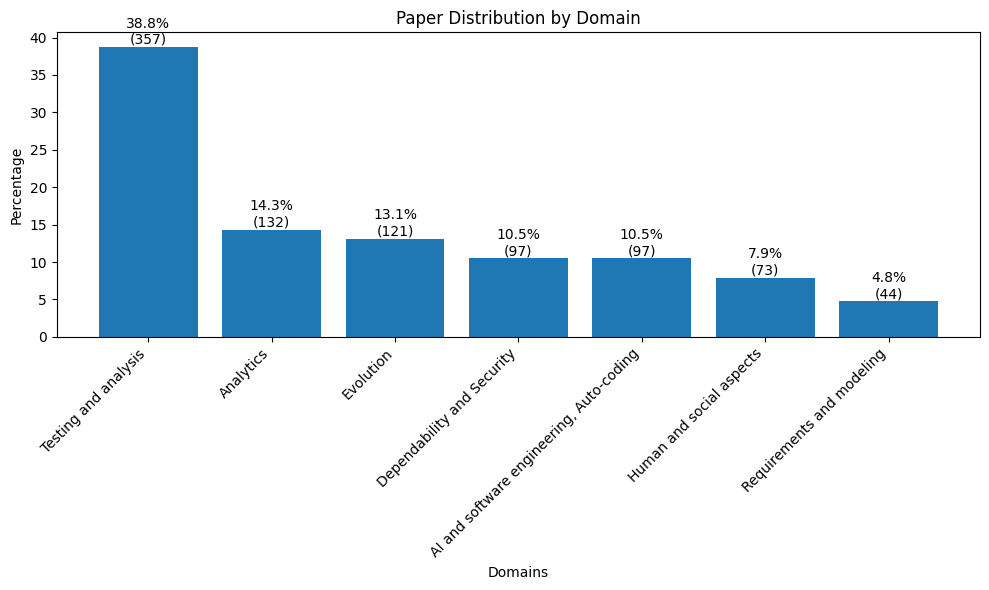

In [80]:
display_names_example = {
    'domain_ai_se': 'AI and software engineering, Auto-coding',
    'domain_analytics': 'Analytics',
    'domain_dependability_security': 'Dependability and Security',
    'domain_evolution': 'Evolution',
    'domain_human_social': 'Human and social aspects', 
    'domain_requirements_modelling': 'Requirements and modeling', 
    'domain_testing_analysis': 'Testing and analysis'
}

# Generate separate plots for pie and sorted monochrome bar chart
plot_domain_paper_distribution(domain_distribution_percentage, papers_count, display_names_example)

## Distribution of DOMAINS by number of distinguished papers inside a domain

In [81]:
def calculate_distinguished_papers(grouped_sessions, domain_mappings):
    # Group by mapped domains
    domain_papers = {}
    total_papers = 0
    total_distinguished = 0
    
    for group, group_data in grouped_sessions.items():
        # Get the mapped domain for this group
        mapped_domain = domain_mappings.get(group)
        
        if not mapped_domain:
            continue
        
        # Initialize domain if not existing
        if mapped_domain not in domain_papers:
            domain_papers[mapped_domain] = {
                'total_papers': 0,
                'distinguished_papers': 0
            }
        
        # Iterate through all domains in the group
        for domain_info in group_data.values():
            if isinstance(domain_info, dict) and 'papers' in domain_info:
                papers = domain_info['papers']
                
                domain_total = len(papers)
                domain_distinguished = sum(1 for paper in papers if paper.get('distinguished', False))
                
                domain_papers[mapped_domain]['total_papers'] += domain_total
                domain_papers[mapped_domain]['distinguished_papers'] += domain_distinguished
                
                total_papers += domain_total
                total_distinguished += domain_distinguished
    
    # Calculate percentages
    domain_stats = {}
    for domain, stats in domain_papers.items():
        domain_percentage = (stats['distinguished_papers'] / stats['total_papers'] * 100) if stats['total_papers'] > 0 else 0
        domain_stats[domain] = {
            'total_papers': stats['total_papers'],
            'distinguished_papers': stats['distinguished_papers'],
            'distinguished_percentage': round(domain_percentage, 2)
        }
    
    overall_percentage = (total_distinguished / total_papers * 100) if total_papers > 0 else 0
    
    return {
        'domain_stats': domain_stats,
        'total_papers': total_papers,
        'total_distinguished': total_distinguished,
        'overall_percentage': round(overall_percentage, 2)
    }

def print_distinguished_analysis(grouped_sessions, domain_mappings):
    results = calculate_distinguished_papers(grouped_sessions, domain_mappings)
    
    # Sort domains by distinguished percentage
    sorted_domains = sorted(
        results['domain_stats'].items(), 
        key=lambda x: x[1]['distinguished_percentage'], 
        reverse=True
    )
    
    print("Distinguished Papers Analysis by Domain:")
    for domain, stats in sorted_domains:
        print(f"{domain}: {stats['distinguished_percentage']}% ({stats['distinguished_papers']}/{stats['total_papers']} papers)")
    
    print("\nOverall Summary:")
    print(f"Total Papers: {results['total_papers']}")
    print(f"Total Distinguished Papers: {results['total_distinguished']}")
    print(f"Overall Distinguished Percentage: {results['overall_percentage']}%")

# Uncomment to use
print_distinguished_analysis(grouped_sessions, domain_mappings)

Distinguished Papers Analysis by Domain:
domain_human_social: 10.96% (8/73 papers)
domain_requirements_modelling: 9.09% (4/44 papers)
domain_dependability_security: 8.25% (8/97 papers)
domain_analytics: 7.58% (10/132 papers)
domain_testing_analysis: 6.72% (24/357 papers)
domain_ai_se: 6.19% (6/97 papers)
domain_evolution: 5.79% (7/121 papers)

Overall Summary:
Total Papers: 921
Total Distinguished Papers: 67
Overall Distinguished Percentage: 7.27%


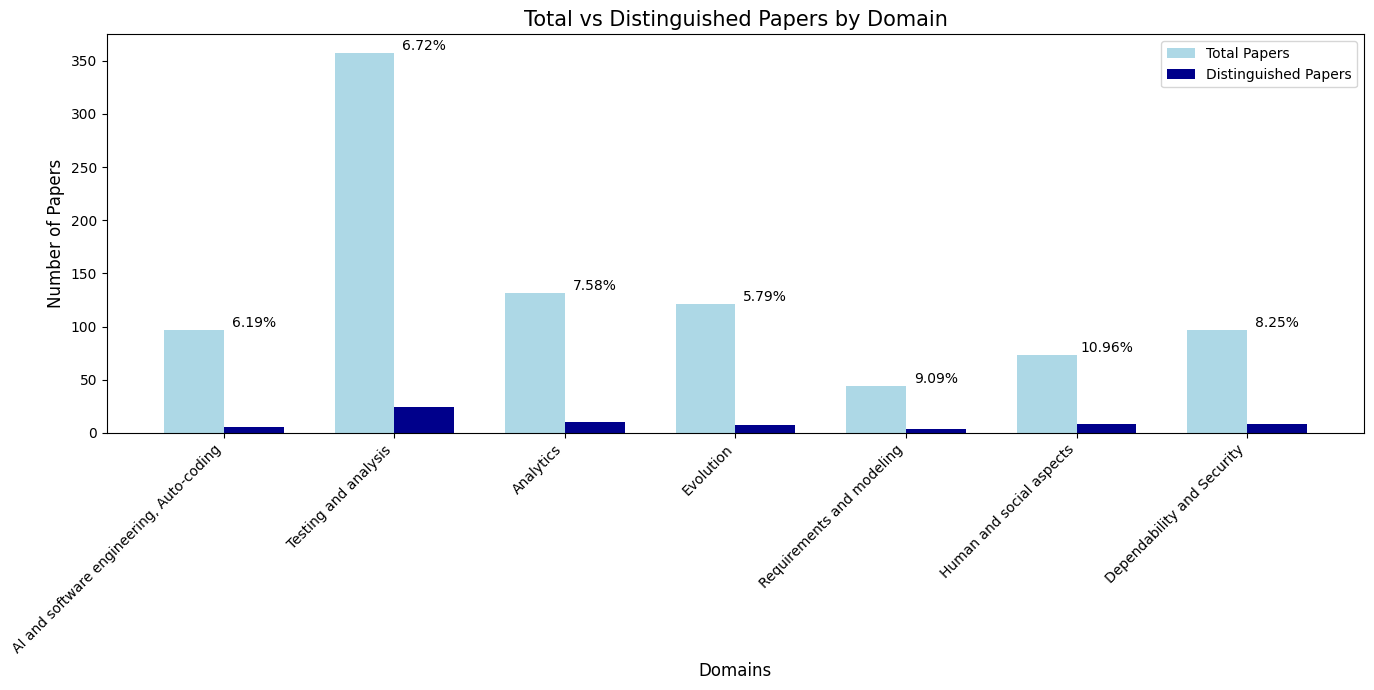

In [82]:
def create_distinguished_papers_plot(grouped_sessions, domain_mappings, display_names):
    # Calculate distinguished papers data
    results = calculate_distinguished_papers(grouped_sessions, domain_mappings)
    domain_stats = results['domain_stats']
    
    # Prepare data for plotting
    domains = list(domain_stats.keys())
    display_domain_names = [display_names.get(domain, domain) for domain in domains]
    total_papers = [stats['total_papers'] for stats in domain_stats.values()]
    distinguished_papers = [stats['distinguished_papers'] for stats in domain_stats.values()]
    
    # Create the plot
    plt.figure(figsize=(14, 7))
    
    # Set up bar positions
    x = np.arange(len(domains))
    width = 0.35
    
    # Plot total papers bars
    total_bars = plt.bar(x - width/2, total_papers, width, label='Total Papers', color='lightblue')
    
    # Plot distinguished papers bars
    distinguished_bars = plt.bar(x + width/2, distinguished_papers, width, label='Distinguished Papers', color='darkblue')
    
    # Customize the plot
    plt.title('Total vs Distinguished Papers by Domain', fontsize=15)
    plt.xlabel('Domains', fontsize=12)
    plt.ylabel('Number of Papers', fontsize=12)
    plt.xticks(x, display_domain_names, rotation=45, ha='right')
    plt.legend()
    
    # Add percentage annotations
    for i, (domain, stats) in enumerate(domain_stats.items()):
        percentage = stats['distinguished_percentage']
        plt.text(x[i] + width/2, stats['total_papers'], f'{percentage}%', 
                 ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

create_distinguished_papers_plot(grouped_sessions, domain_mappings, display_names_example)

# Write the dictionary inside a csv

In [83]:
domain_mappings = {
    'group_ai_engineering': 'domain_ai_se',
    'group_ai_4_se': 'domain_ai_se',
    'group_ai_ml': 'domain_ai_se',
    'group_ai_performance': 'domain_analytics',
    'group_quality_management': 'domain_analytics',
    'group_security_privacy': 'domain_dependability_security',
    'group_vulnerability': 'domain_dependability_security',
    'group_software_dev': 'domain_evolution',
    'group_human_social': 'domain_human_social',
    'group_requirements': 'domain_requirements_modelling',
    'group_compilers_languages': 'domain_requirements_modelling',
    'group_special_apps': 'domain_requirements_modelling',
    'group_testing': 'domain_testing_analysis',
    'group_program_analysis': 'domain_testing_analysis',
    'group_software_analysis': 'domain_testing_analysis',
    'group_bugs': 'domain_testing_analysis'
}

# Map each paper to its domain
papers_by_domain = {}

# Traverse grouped_sessions and process papers
for group, subgroups in grouped_sessions.items():
    domain = domain_mappings.get(group)
    
    if domain:  # If a domain is found for the group
        for subgroup, details in subgroups.items():
            for paper in details.get('papers', []):
                if domain not in papers_by_domain:
                    papers_by_domain[domain] = []
                papers_by_domain[domain].append(paper)

os.makedirs('csv_files', exist_ok=True)
    
# Write to CSV in csv_files directory
csv_file_path = os.path.join('csv_files', 'papers_by_domain.csv')

csv_file = 'papers_by_domain.csv'
if papers_by_domain:
    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Domain', 'Paper Name', 'Authors', 'Distinguished'])
        
        for domain, papers in papers_by_domain.items():
            for paper in papers:
                writer.writerow([
                    domain, 
                    paper['name'], 
                    ', '.join(paper['authors']), 
                    paper['distinguished']
                ])

    print(f"CSV file '{csv_file}' created successfully.")
else:
    print("No papers to write to CSV.")


CSV file 'papers_by_domain.csv' created successfully.
